In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
path = '/Users/freezylex/Desktop/курсач/Metrics and target/All metrics in one folder'

In [16]:
files = os.listdir(path)
files

['price_dispersion.xlsx',
 'till_redemption.xlsx',
 'trading_share.xlsx',
 'URC.xlsx',
 'trades_count.xlsx',
 'trading_volumne.xlsx',
 'priced_minus_market_data.xlsx',
 'bid_ask_spread.xlsx',
 'MS.xlsx']

In [14]:
price_disp = pd.read_excel(path + '/' + files[0], index_col = 'Unnamed: 0', parse_dates = True)
till_red = pd.read_excel(path + '/' + files[1], index_col = 'Date', parse_dates = True)
trad_share = pd.read_excel(path + '/' + files[2], index_col = 'Unnamed: 0', parse_dates = True)
urc = pd.read_excel(path + '/' + files[3], index_col = 'Unnamed: 0', parse_dates = True)
trad_count = pd.read_excel(path + '/' + files[4], index_col = 'Date', parse_dates = True)
trad_vol = pd.read_excel(path + '/' + files[5], index_col = 'Unnamed: 0', parse_dates = True)
target = pd.read_excel(path + '/' + files[6], index_col = 'Date', parse_dates = True)
bid_ask = pd.read_excel(path + '/' + files[7], index_col = 'Date', parse_dates = True)
ms = pd.read_excel(path + '/' + files[8], index_col = 'Unnamed: 0', parse_dates = True)

In [20]:
id_ = np.arange(1, len(ms.columns) + 1)
id_ = np.tile(id_, 184)

In [61]:
complete_data = pd.DataFrame(columns = ['id', 'time', 'bond', 'PD', 
                                        'TR', 'TS', 'URC', 'TC', 
                                        'TV', 'BA', 'MS', 'target'])
complete_data['id'] = id_
complete_data['time'] = np.repeat(bid_ask.index, repeats=13)
complete_data

,id,time,bond,PD,TR,TS,URC,TC,TV,BA,MS,target
0,1,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,9,2016-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2388,10,2016-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2389,11,2016-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,12,2016-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
transfer = {'SU26214RMFS':1, 
            'SU26215RMFS':2, 
            'SU26216RMFS':3, 
            'SU26203RMFS':4,
            'SU26204RMFS':5, 
            'SU26205RMFS':6, 
            'SU26206RMFS':7, 
            'SU26207RMFS':8,
            'SU26208RMFS':9, 
            'SU26209RMFS':10, 
            'SU26210RMFS':11, 
            'SU26211RMFS':12,
            'SU26212RMFS':13}

In [56]:
for column in price_disp.columns:
    bond_data = price_disp[column]
    number = transfer[column]
    for date in bond_data.index:
        complete_data.loc[(complete_data['id'] ==number)&(complete_data['time'] == date), 'PD'] = bond_data.loc[date]

In [57]:
complete_data

,id,time,bond,PD,TR,TS,URC,TC,TV,BA,MS,target
0,1,2015-06-01,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2015-06-01,NaN,0.04001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015-06-01,NaN,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2015-06-01,NaN,0.0362668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2015-06-01,NaN,0.186804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,9,2016-02-19,NaN,0.0684223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2388,10,2016-02-19,NaN,0.0427217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2389,11,2016-02-19,NaN,0.0336649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,12,2016-02-19,NaN,0.0739371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
def make_feature(df, feature_name):
    global complete_data
    for column in df.columns:
        bond_data = df[column]
        number = transfer[column]
        for date in bond_data.index:
            complete_data.loc[(complete_data['id'] ==number)&(complete_data['time'] == date), feature_name] = bond_data.loc[date]
            

In [60]:
list_with_dfs = [('PD', price_disp), 
 ('TR', till_red), 
 ('TS', trad_share),
 ('URC', urc),
 ('TC', trad_count),
 ('TV', trad_vol),
 ('BA', bid_ask),
 ('MS', ms),
 ('target', target)]

In [63]:
from tqdm import tqdm

In [64]:
for feature, dataframe in tqdm(list_with_dfs):
    make_feature(dataframe, feature)

100%|██████████| 9/9 [00:31<00:00,  3.47s/it]


In [65]:
complete_data

,id,time,bond,PD,TR,TS,URC,TC,TV,BA,MS,target
0,1,2015-06-01,NaN,0,4.99178,0.0299977,0,1,8300,74.96,0.00323607,5.79101
1,2,2015-06-01,NaN,0.04001,8.2137,0.246532,0.00245339,5,180046,44,0.0701978,-8.56965
2,3,2015-06-01,NaN,0.375,3.95616,4.4437e-05,0.00858369,2,4,96.98,1.55955e-06,-23.599
3,4,2015-06-01,NaN,0.0362668,1.17534,0.207268,0.00363966,10,185306,24,0.0722486,6.81559
4,5,2015-06-01,NaN,0.186804,2.78904,0.0126303,0.0162032,15,1780,74.93,0.000694001,2.9531
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,9,2016-02-19,NaN,0.0684223,3.02466,0.0101565,1.05364,31,10514,15.55,0.00223115,-8.71834
2388,10,2016-02-19,NaN,0.0427217,6.41918,0.000212295,0.00354133,23,184,29.95,3.90461e-05,14.9075
2389,11,2016-02-19,NaN,0.0336649,3.81096,0.181261,1.01148,121,369368,28.72,0.0783826,8.03867
2390,12,2016-02-19,NaN,0.0739371,6.93699,0.000229303,0.00820782,52,208,27.98,4.41391e-05,-9.1036


In [72]:
complete_data['bond'] = np.tile(price_disp.columns.values, reps=184)
complete_data

,id,time,bond,PD,TR,TS,URC,TC,TV,BA,MS,target
0,1,2015-06-01,SU26214RMFS,0,4.99178,0.0299977,0,1,8300,74.96,0.00323607,5.79101
1,2,2015-06-01,SU26215RMFS,0.04001,8.2137,0.246532,0.00245339,5,180046,44,0.0701978,-8.56965
2,3,2015-06-01,SU26216RMFS,0.375,3.95616,4.4437e-05,0.00858369,2,4,96.98,1.55955e-06,-23.599
3,4,2015-06-01,SU26203RMFS,0.0362668,1.17534,0.207268,0.00363966,10,185306,24,0.0722486,6.81559
4,5,2015-06-01,SU26204RMFS,0.186804,2.78904,0.0126303,0.0162032,15,1780,74.93,0.000694001,2.9531
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,9,2016-02-19,SU26208RMFS,0.0684223,3.02466,0.0101565,1.05364,31,10514,15.55,0.00223115,-8.71834
2388,10,2016-02-19,SU26209RMFS,0.0427217,6.41918,0.000212295,0.00354133,23,184,29.95,3.90461e-05,14.9075
2389,11,2016-02-19,SU26210RMFS,0.0336649,3.81096,0.181261,1.01148,121,369368,28.72,0.0783826,8.03867
2390,12,2016-02-19,SU26211RMFS,0.0739371,6.93699,0.000229303,0.00820782,52,208,27.98,4.41391e-05,-9.1036


In [80]:
f = np.arange(1, 185)
f

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [85]:
for_date = (np.repeat(f, repeats=13))

In [86]:
complete_data['time'] = for_date
complete_data

,id,time,bond,PD,TR,TS,URC,TC,TV,BA,MS,target
0,1,1,SU26214RMFS,0,4.99178,0.0299977,0,1,8300,74.96,0.00323607,5.79101
1,2,1,SU26215RMFS,0.04001,8.2137,0.246532,0.00245339,5,180046,44,0.0701978,-8.56965
2,3,1,SU26216RMFS,0.375,3.95616,4.4437e-05,0.00858369,2,4,96.98,1.55955e-06,-23.599
3,4,1,SU26203RMFS,0.0362668,1.17534,0.207268,0.00363966,10,185306,24,0.0722486,6.81559
4,5,1,SU26204RMFS,0.186804,2.78904,0.0126303,0.0162032,15,1780,74.93,0.000694001,2.9531
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,9,184,SU26208RMFS,0.0684223,3.02466,0.0101565,1.05364,31,10514,15.55,0.00223115,-8.71834
2388,10,184,SU26209RMFS,0.0427217,6.41918,0.000212295,0.00354133,23,184,29.95,3.90461e-05,14.9075
2389,11,184,SU26210RMFS,0.0336649,3.81096,0.181261,1.01148,121,369368,28.72,0.0783826,8.03867
2390,12,184,SU26211RMFS,0.0739371,6.93699,0.000229303,0.00820782,52,208,27.98,4.41391e-05,-9.1036


In [87]:
complete_data.to_excel('final_for_regression.xlsx')

# Some EDA

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
complete_data = pd.read_excel('final_for_regression.xlsx', index_col = 'Unnamed: 0')
complete_data

,id,time,bond,PD,TR,TS,URC,TC,TV,BA,MS,target
0,1,1,SU26214RMFS,0.000000,4.991781,0.029998,0.000000,1,8300,74.96,0.003236,5.791009
1,2,1,SU26215RMFS,0.040010,8.213699,0.246532,0.002453,5,180046,44.00,0.070198,-8.569653
2,3,1,SU26216RMFS,0.375000,3.956164,0.000044,0.008584,2,4,96.98,0.000002,-23.599046
3,4,1,SU26203RMFS,0.036267,1.175342,0.207268,0.003640,10,185306,24.00,0.072249,6.815592
4,5,1,SU26204RMFS,0.186804,2.789041,0.012630,0.016203,15,1780,74.93,0.000694,2.953099
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,9,184,SU26208RMFS,0.068422,3.024658,0.010157,1.053639,31,10514,15.55,0.002231,-8.718340
2388,10,184,SU26209RMFS,0.042722,6.419178,0.000212,0.003541,23,184,29.95,0.000039,14.907458
2389,11,184,SU26210RMFS,0.033665,3.810959,0.181261,1.011484,121,369368,28.72,0.078383,8.038666
2390,12,184,SU26211RMFS,0.073937,6.936986,0.000229,0.008208,52,208,27.98,0.000044,-9.103595


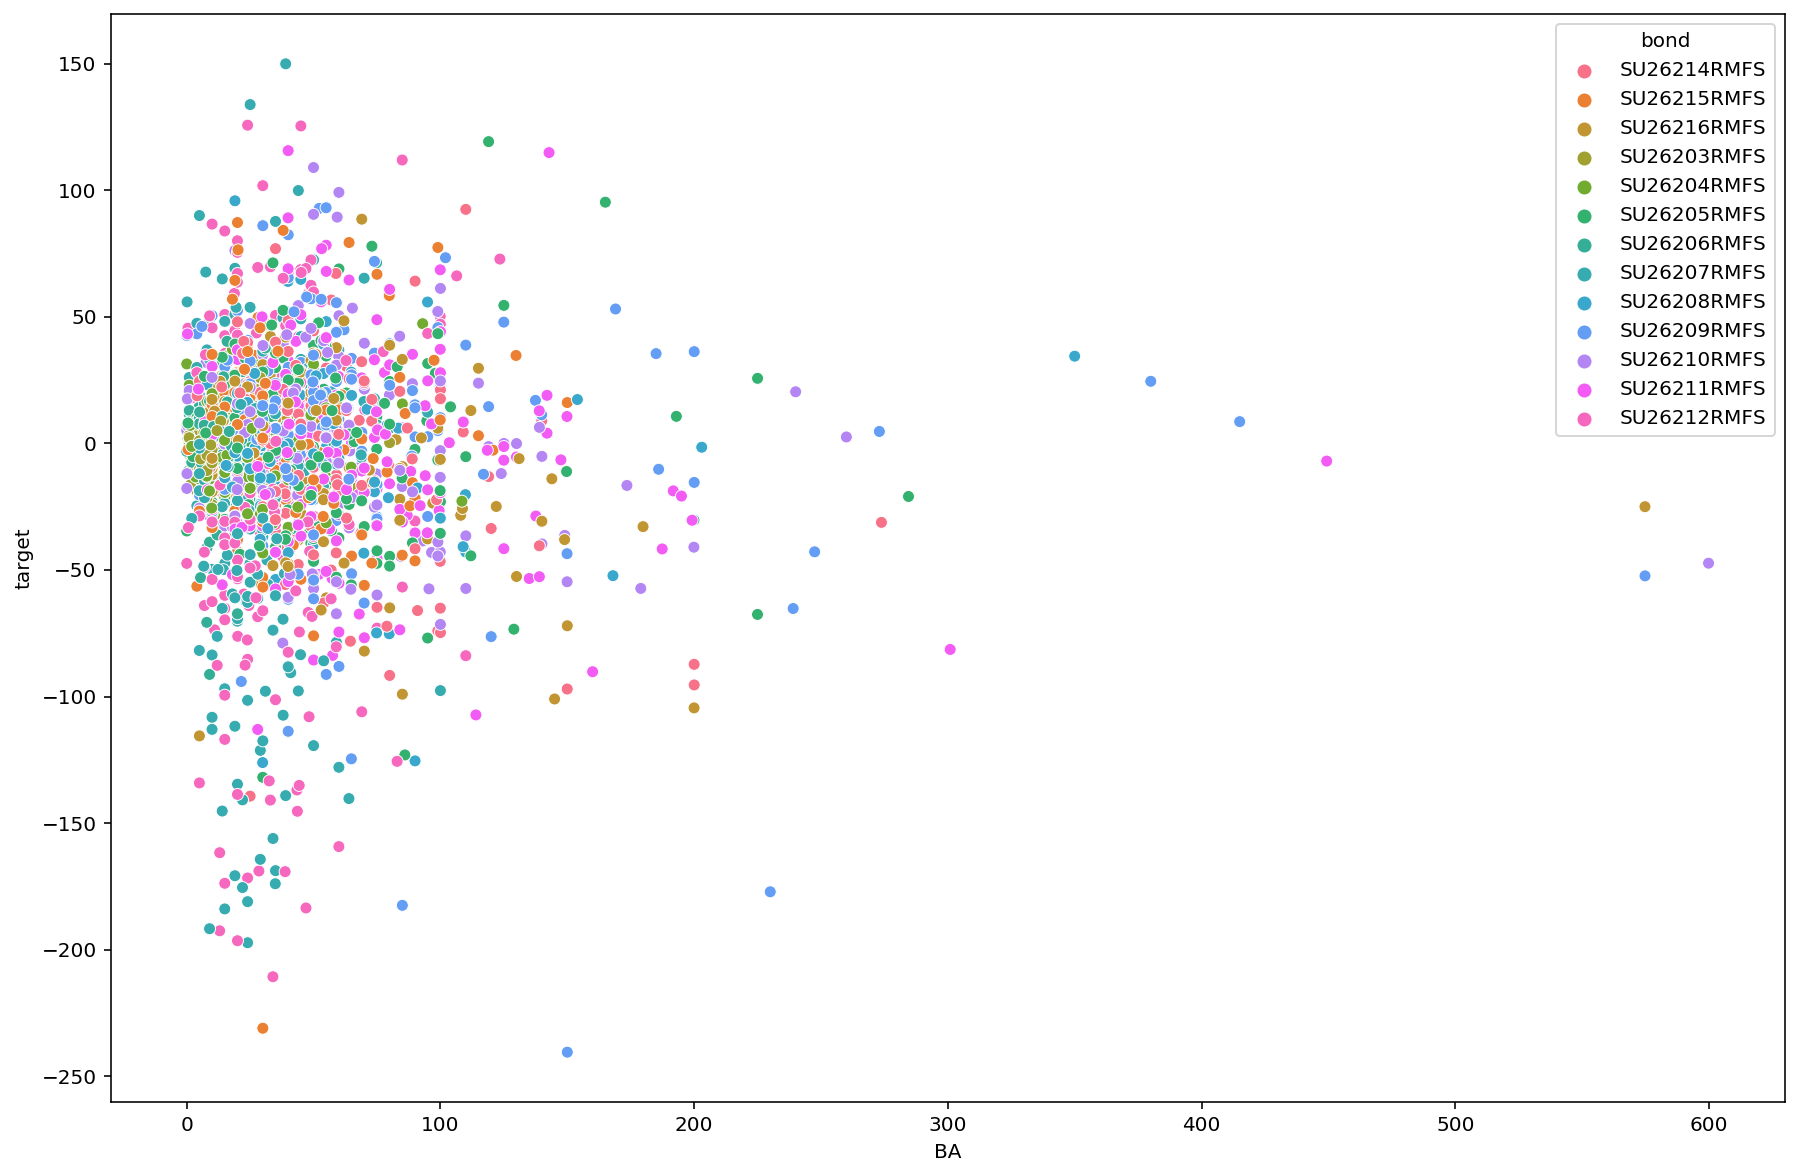

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x = complete_data['BA'],
               y = complete_data['target'],
               hue=complete_data['bond'])
#plt.title('Dependence of target variable from years till redemption')
#plt.savefig('scatter_tr_target.png', dpi=300)

In [62]:
corr = corr.drop(labels=['id', 'target']).drop(columns=['id', 'target'])
corr

,PD,TR,TS,URC,TC,TV,BA,MS
PD,1.000000,-0.057615,0.134699,0.230200,0.225607,0.163561,0.234393,0.007850
TR,-0.057615,1.000000,0.084100,-0.455336,-0.655911,-0.327378,0.629152,0.254785
TS,0.134699,0.084100,1.000000,0.010424,0.025348,0.452915,0.006424,0.130377
URC,0.230200,-0.455336,0.010424,1.000000,0.394548,0.252504,-0.162491,-0.052445
TC,0.225607,-0.655911,0.025348,0.394548,1.000000,0.513409,-0.380623,-0.198232
TV,0.163561,-0.327378,0.452915,0.252504,0.513409,1.000000,-0.224028,-0.004730
BA,0.234393,0.629152,0.006424,-0.162491,-0.380623,-0.224028,1.000000,0.141402
MS,0.007850,0.254785,0.130377,-0.052445,-0.198232,-0.004730,0.141402,1.000000


In [69]:
ff = complete_data[complete_data['id'] == 8]
ff

,id,time,bond,PD,TR,TS,URC,TC,TV,BA,MS,target
7,8,1,SU26207RMFS,0.018156,11.684932,0.287535,0.017420,31,1943404,14.00,0.757710,6.122521
20,8,2,SU26207RMFS,0.135619,11.682192,0.214501,0.029158,45,212412,34.00,0.426897,18.363006
33,8,3,SU26207RMFS,0.183091,11.679452,0.292166,0.032105,36,1800676,29.99,0.245293,-36.803284
46,8,4,SU26207RMFS,0.322236,11.676712,0.219399,0.023142,88,2239636,9.99,0.314524,-49.751641
59,8,5,SU26207RMFS,0.208616,11.673973,0.210976,0.015009,74,1956064,33.45,0.502242,2.325640
...,...,...,...,...,...,...,...,...,...,...,...,...
2334,8,180,SU26207RMFS,0.099706,10.975342,0.179431,1.026692,209,1341942,19.99,0.287782,-35.686168
2347,8,181,SU26207RMFS,0.276555,10.972603,0.117181,1.071188,261,909726,12.30,0.155061,-49.793261
2360,8,182,SU26207RMFS,0.109632,10.969863,0.242045,1.040186,136,1811786,21.35,0.197657,15.401036
2373,8,183,SU26207RMFS,0.307590,10.967123,0.189065,1.009965,211,879848,4.99,0.088170,-0.356815


In [73]:
dd = complete_data[complete_data['id'] == 4]
dd

,id,time,bond,PD,TR,TS,URC,TC,TV,BA,MS,target
3,4,1,SU26203RMFS,0.036267,1.175342,0.207268,0.003640,10,185306,24.00,0.072249,6.815592
16,4,2,SU26203RMFS,0.025936,1.172603,0.175141,0.031106,31,66634,28.99,0.133918,-6.350430
29,4,3,SU26203RMFS,0.099487,1.169863,0.081531,0.029809,19,41228,18.90,0.005616,-11.224853
42,4,4,SU26203RMFS,0.052332,1.167123,0.021637,0.041333,19,15550,7.98,0.002184,-5.091326
55,4,5,SU26203RMFS,0.040399,1.164384,0.003411,0.001352,4,708,29.00,0.000182,4.281987
...,...,...,...,...,...,...,...,...,...,...,...,...
2330,4,180,SU26203RMFS,0.031684,0.465753,0.233192,0.020223,785,384460,6.75,0.082448,4.297584
2343,4,181,SU26203RMFS,0.058152,0.463014,0.317516,0.010013,105,498918,0.97,0.085039,2.236292
2356,4,182,SU26203RMFS,0.052042,0.460274,0.016649,1.016620,76,15148,4.99,0.001653,1.003929
2369,4,183,SU26203RMFS,0.013574,0.457534,0.319968,1.008838,154,1382442,13.41,0.138536,8.775823


In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
X = complete_data[complete_data.columns[3:-1]]
X

,PD,TR,TS,URC,TC,TV,BA,MS
0,0.000000,4.991781,0.029998,0.000000,1,8300,74.96,0.003236
1,0.040010,8.213699,0.246532,0.002453,5,180046,44.00,0.070198
2,0.375000,3.956164,0.000044,0.008584,2,4,96.98,0.000002
3,0.036267,1.175342,0.207268,0.003640,10,185306,24.00,0.072249
4,0.186804,2.789041,0.012630,0.016203,15,1780,74.93,0.000694
...,...,...,...,...,...,...,...,...
2387,0.068422,3.024658,0.010157,1.053639,31,10514,15.55,0.002231
2388,0.042722,6.419178,0.000212,0.003541,23,184,29.95,0.000039
2389,0.033665,3.810959,0.181261,1.011484,121,369368,28.72,0.078383
2390,0.073937,6.936986,0.000229,0.008208,52,208,27.98,0.000044


In [10]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]


In [12]:
vif_data.sort_values('VIF')

,feature,VIF
3,URC,1.563553
4,TC,1.596543
6,BA,1.849361
0,PD,2.250873
5,TV,2.276192
2,TS,2.976367
1,TR,3.523585
7,MS,3.525134
